# Alphavantage Intraday
* API for "real time" stock data
* Freeium model - sign up fro free account to get API key
* Can make API calls directly or install the helper library:
pip install alpha_vantage from the command line

#### https://alphavantage.co

### 1. Set up Environment

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

### 2. Store API Key

In [5]:
# replace with your own API key
key = open('1-alphavantage.txt').read()

### 3. Create TimeSeries Object and Make API Call

In [6]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')

### 4. Examine Data

In [7]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2021-01-07 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6459 entries, 2021-01-07 20:00:00 to 2020-12-28 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    6459 non-null   float64
 1   2. high    6459 non-null   float64
 2   3. low     6459 non-null   float64
 3   4. close   6459 non-null   float64
 4   5. volume  6459 non-null   float64
dtypes: float64(5)
memory usage: 302.8 KB


In [9]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-01-07 20:00:00,829.02,829.5000,828.82,829.50,14315.0
2021-01-07 19:59:00,829.45,829.4500,829.00,829.14,10706.0
2021-01-07 19:58:00,830.00,830.0099,829.50,829.50,9655.0
2021-01-07 19:57:00,830.50,830.5000,829.84,830.00,5355.0
2021-01-07 19:56:00,830.88,830.9500,830.60,830.90,3087.0


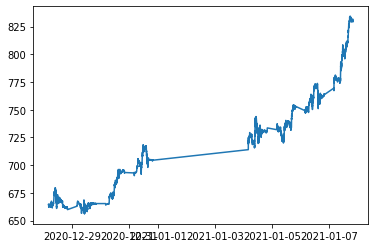

In [10]:
plt.plot(data['4. close'])

### 5. Rename Columns and Add Separate Date and Time Columns

In [11]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [13]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [14]:
data.loc['2020-12-31']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2020-12-31 20:00:00,704.69,704.70,704.50,704.50,2435.0,2020-12-31,20:00:00
2020-12-31 19:59:00,704.50,704.70,704.50,704.70,5691.0,2020-12-31,19:59:00
2020-12-31 19:58:00,704.48,704.50,704.48,704.50,2642.0,2020-12-31,19:58:00
2020-12-31 19:57:00,704.40,704.47,704.40,704.40,1453.0,2020-12-31,19:57:00
2020-12-31 19:54:00,704.35,704.47,704.35,704.35,2701.0,2020-12-31,19:54:00
...,...,...,...,...,...,...,...
2020-12-31 04:07:00,692.00,692.00,692.00,692.00,718.0,2020-12-31,04:07:00
2020-12-31 04:06:00,692.70,692.70,692.70,692.70,444.0,2020-12-31,04:06:00
2020-12-31 04:04:00,693.62,693.62,693.20,693.20,2586.0,2020-12-31,04:04:00


In [15]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3128 entries, 2020-12-28 09:30:00 to 2021-01-07 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3128 non-null   float64
 1   high       3128 non-null   float64
 2   low        3128 non-null   float64
 3   close      3128 non-null   float64
 4   volume     3128 non-null   float64
 5   TradeDate  3128 non-null   object 
 6   time       3128 non-null   object 
dtypes: float64(5), object(2)
memory usage: 195.5+ KB


In [16]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2020-12-28,660.8000,681.4000
2020-12-29,655.0000,669.9000
2020-12-30,668.3603,696.6000
2020-12-31,691.1200,718.7200
2021-01-04,717.1895,744.4899
2021-01-05,719.2000,740.8400
2021-01-06,749.1000,774.0000
2021-01-07,775.2000,816.9900


In [17]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2020-12-28 10:49:00,661.025,663.8800,660.8000,663.8800,169251.0,2020-12-28,10:49:00
2020-12-29 10:15:00,657.000,658.5800,655.0000,656.0600,162237.0,2020-12-29,10:15:00
2020-12-30 09:41:00,669.685,671.6300,668.3603,671.3301,141286.0,2020-12-30,09:41:00
2020-12-31 09:57:00,692.670,693.1200,691.1200,691.7961,175834.0,2020-12-31,09:57:00
2021-01-04 09:31:00,719.460,721.4900,717.1895,717.6900,871163.0,2021-01-04,09:31:00
2021-01-05 09:34:00,720.530,722.9109,719.2000,719.9714,209148.0,2021-01-05,09:34:00
2021-01-06 10:01:00,751.520,752.2772,749.1000,751.4219,349451.0,2021-01-06,10:01:00
2021-01-07 09:32:00,776.660,777.7000,775.2000,776.2500,236797.0,2021-01-07,09:32:00


In [18]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2020-12-28 09:43:00,679.8350,681.4000,678.0000,678.8728,416362.0,2020-12-28,09:43:00
2020-12-29 09:49:00,668.8599,669.9000,667.2000,667.7950,154742.0,2020-12-29,09:49:00
2020-12-30 14:44:00,695.6699,696.6000,695.5801,696.1716,166469.0,2020-12-30,14:44:00
2020-12-31 11:38:00,717.5985,718.7200,717.4100,718.4900,239463.0,2020-12-31,11:38:00
2021-01-04 10:33:00,741.7239,744.4899,741.6500,743.8500,295133.0,2021-01-04,10:33:00
2021-01-05 11:34:00,739.5500,740.8400,739.2000,740.3900,107022.0,2021-01-05,11:34:00
2021-01-06 14:07:00,772.7913,774.0000,772.6700,773.7541,130661.0,2021-01-06,14:07:00
2021-01-07 15:55:00,816.4611,816.9900,815.4400,815.9050,240217.0,2021-01-07,15:55:00
